<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


In [3]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

Plot the distribution curve for the column `ConvertedComp`.


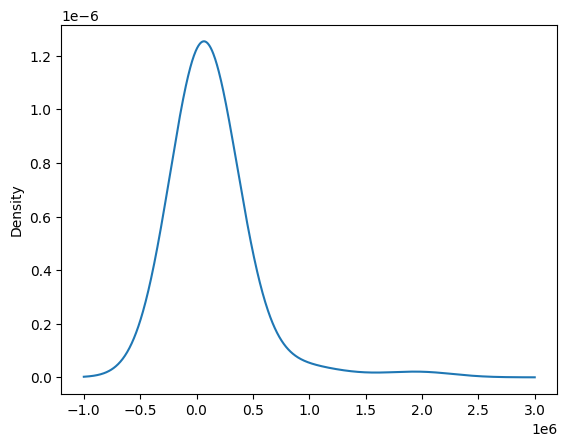

In [13]:
ax = df['ConvertedComp'].plot.kde(bw_method=1)


Plot the histogram for the column `ConvertedComp`.


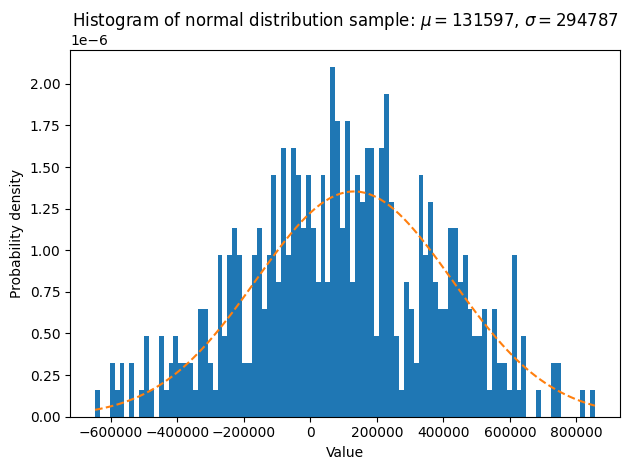

In [26]:
rng = np.random.default_rng(19680801) # Random distribution

# example data
mu = df['ConvertedComp'].mean()  # mean of distribution
sigma = df['ConvertedComp'].std() # standard deviation of distribution
x = rng.normal(loc=mu, scale=sigma, size=420)

# optimize number of bins
num_bins = int(np.floor(np.sqrt(df['ConvertedComp'].value_counts().sum())))

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

What is the median of the column `ConvertedComp`?


In [27]:
df['ConvertedComp'].median()


57745.0

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [41]:
woman_df = df[(df['Gender'] == "Woman")]
woman_df['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [46]:
min_age = df['Age'].min()
max_age = df['Age'].max()
med_age = df['Age'].median()
q1_q3_age = df['Age'].quantile([0.25, 0.75])
print(med_age)



29.0


Plot a histogram of the column `Age`.


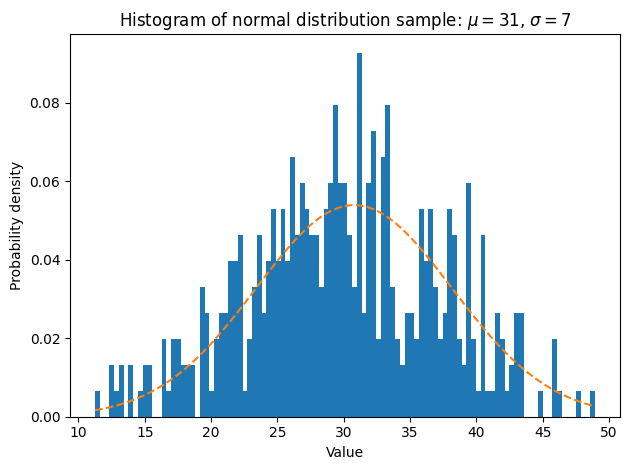

In [47]:
rng = np.random.default_rng(19680801) # Random distribution

# example data
mu = df['Age'].mean()  # mean of distribution
sigma = df['Age'].std() # standard deviation of distribution
x = rng.normal(loc=mu, scale=sigma, size=420)

# optimize number of bins
num_bins = int(np.floor(np.sqrt(df['Age'].value_counts().sum())))

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--')
ax.set_xlabel('Value')
ax.set_ylabel('Probability density')
ax.set_title('Histogram of normal distribution sample: '
             fr'$\mu={mu:.0f}$, $\sigma={sigma:.0f}$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


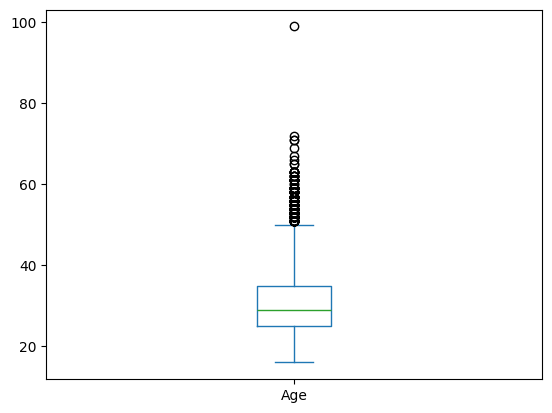

In [174]:
from matplotlib.patches import Polygon


# basic plot
ax = df['ConvertedComp'].plot.box()




Find out the Inter Quartile Range for the column `ConvertedComp`.


In [67]:
Q3= df['ConvertedComp'].quantile(0.75)
Q1= df['ConvertedComp'].quantile(0.25)

IQR = Q3-Q1
print(IQR,Q3,Q1)



73132.0 100000.0 26868.0


Find out the upper and lower bounds.


In [66]:
# your code goes here
upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR
print(upper_bound,lower_bound)

209698.0 -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [180]:
outlier_df = df[(df['ConvertedComp'] > upper_bound)]
outlier_df['ConvertedComp'].count()
to_drop_df= pd.DataFrame(outlier_df['ConvertedComp'])
to_drop_df['to_drop']=to_drop_df['ConvertedComp']

tolist=outlier_df['Respondent'].values.tolist()

#df.columns.get_loc('Age')


In [176]:
df1 = df
df2 = to_drop_df['to_drop']

# Merge DataFrames on the common column ('ID')
merged_df = pd.merge(df1, df2, left_on='ConvertedComp', right_on='to_drop', how='left', indicator=True)

# Drop the rows that need to be removed
df1_modified = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['to_drop', '_merge'])

# Now, 'df1_modified' contains the DataFrame with specified rows removed
print(df1_modified)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
43237       25136  I am a developer by profession      Yes   
43238       25137  I am a developer by profession      Yes   
43239       25138  I am a developer by profession      Yes   
43240       25141  I am a developer by profession      Yes   
43241       25142  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less tha

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [179]:
df1_modified['ConvertedComp'].median()

52704.0

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [182]:

corr_1=df['Age'].corr(df['CompTotal'])
corr_2=df['Age'].corr(df['ConvertedComp'])
corr_3=df['Age'].corr(df['WorkWeekHrs'])
corr_4=df['Age'].corr(df['CodeRevHrs'])

print(corr_1,corr_2,corr_3,corr_4)

0.006969933096795743 0.10538616072629148 0.03651764909319292 -0.02046911197003011


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
